# CREDIT CARD FRAUD DETECTION

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Information about the data frame

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## checking for null values

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Checking for duplicate values

In [6]:
df.duplicated().sum()

1081

### removing the duplicate values

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

## Checking the distribution of legit and fraudulent transanctions

In [9]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

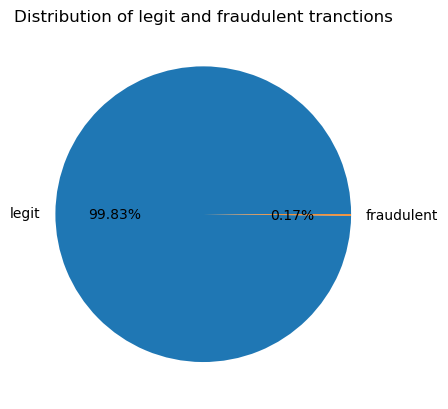

In [10]:
df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

## Seperating the data for analysis

In [11]:
fraud = df[df['Class']==1]
legit = df[df['Class']==0]

In [12]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## statistical measure of the data

In [14]:
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## Comparing the values of both transanctions

In [16]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [17]:
legit_sample = legit.sample(n=473)

## Concatenating 2 dataframes

In [18]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [19]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15538,26930.0,-2.049444,-2.120651,2.263753,-1.481701,1.935508,-0.973156,-1.516857,0.122478,-0.468878,...,0.360629,0.747861,-0.211132,-0.933079,0.839918,-0.059260,0.075746,-0.062637,9.10,0
121965,76385.0,1.177811,0.296658,0.286432,0.991251,0.126681,0.119418,-0.023638,0.076871,-0.338249,...,0.132385,0.466552,-0.136234,-0.276705,0.634774,-0.249955,0.034714,0.005825,1.00,0
279202,168704.0,-1.417668,0.056666,2.760027,0.551785,-1.471575,2.525317,-2.293458,-1.900349,-0.247726,...,-1.465320,0.688690,-0.510014,0.697665,0.197121,-0.249469,0.133030,0.119416,100.00,0
29104,35323.0,1.199279,0.007817,0.361189,0.776309,-0.367001,-0.483680,0.042117,-0.146830,0.415614,...,-0.232101,-0.530065,-0.063371,0.083957,0.506528,0.286284,-0.025545,0.015580,37.08,0
171012,120454.0,-1.066057,1.663120,-1.096740,-0.754692,0.307434,-0.630656,0.369926,0.567332,0.410890,...,-0.328924,-0.894637,0.211763,0.542777,-0.373781,0.100936,0.265371,0.198828,9.85,0


In [20]:
new_df.shape

(946, 31)

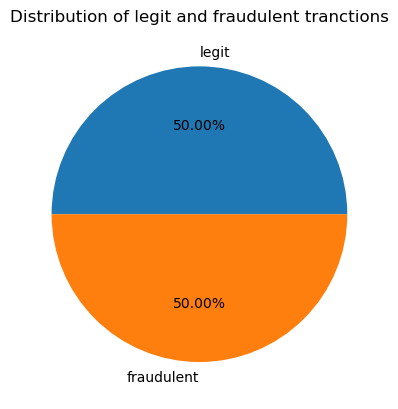

In [21]:
new_df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

In [22]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


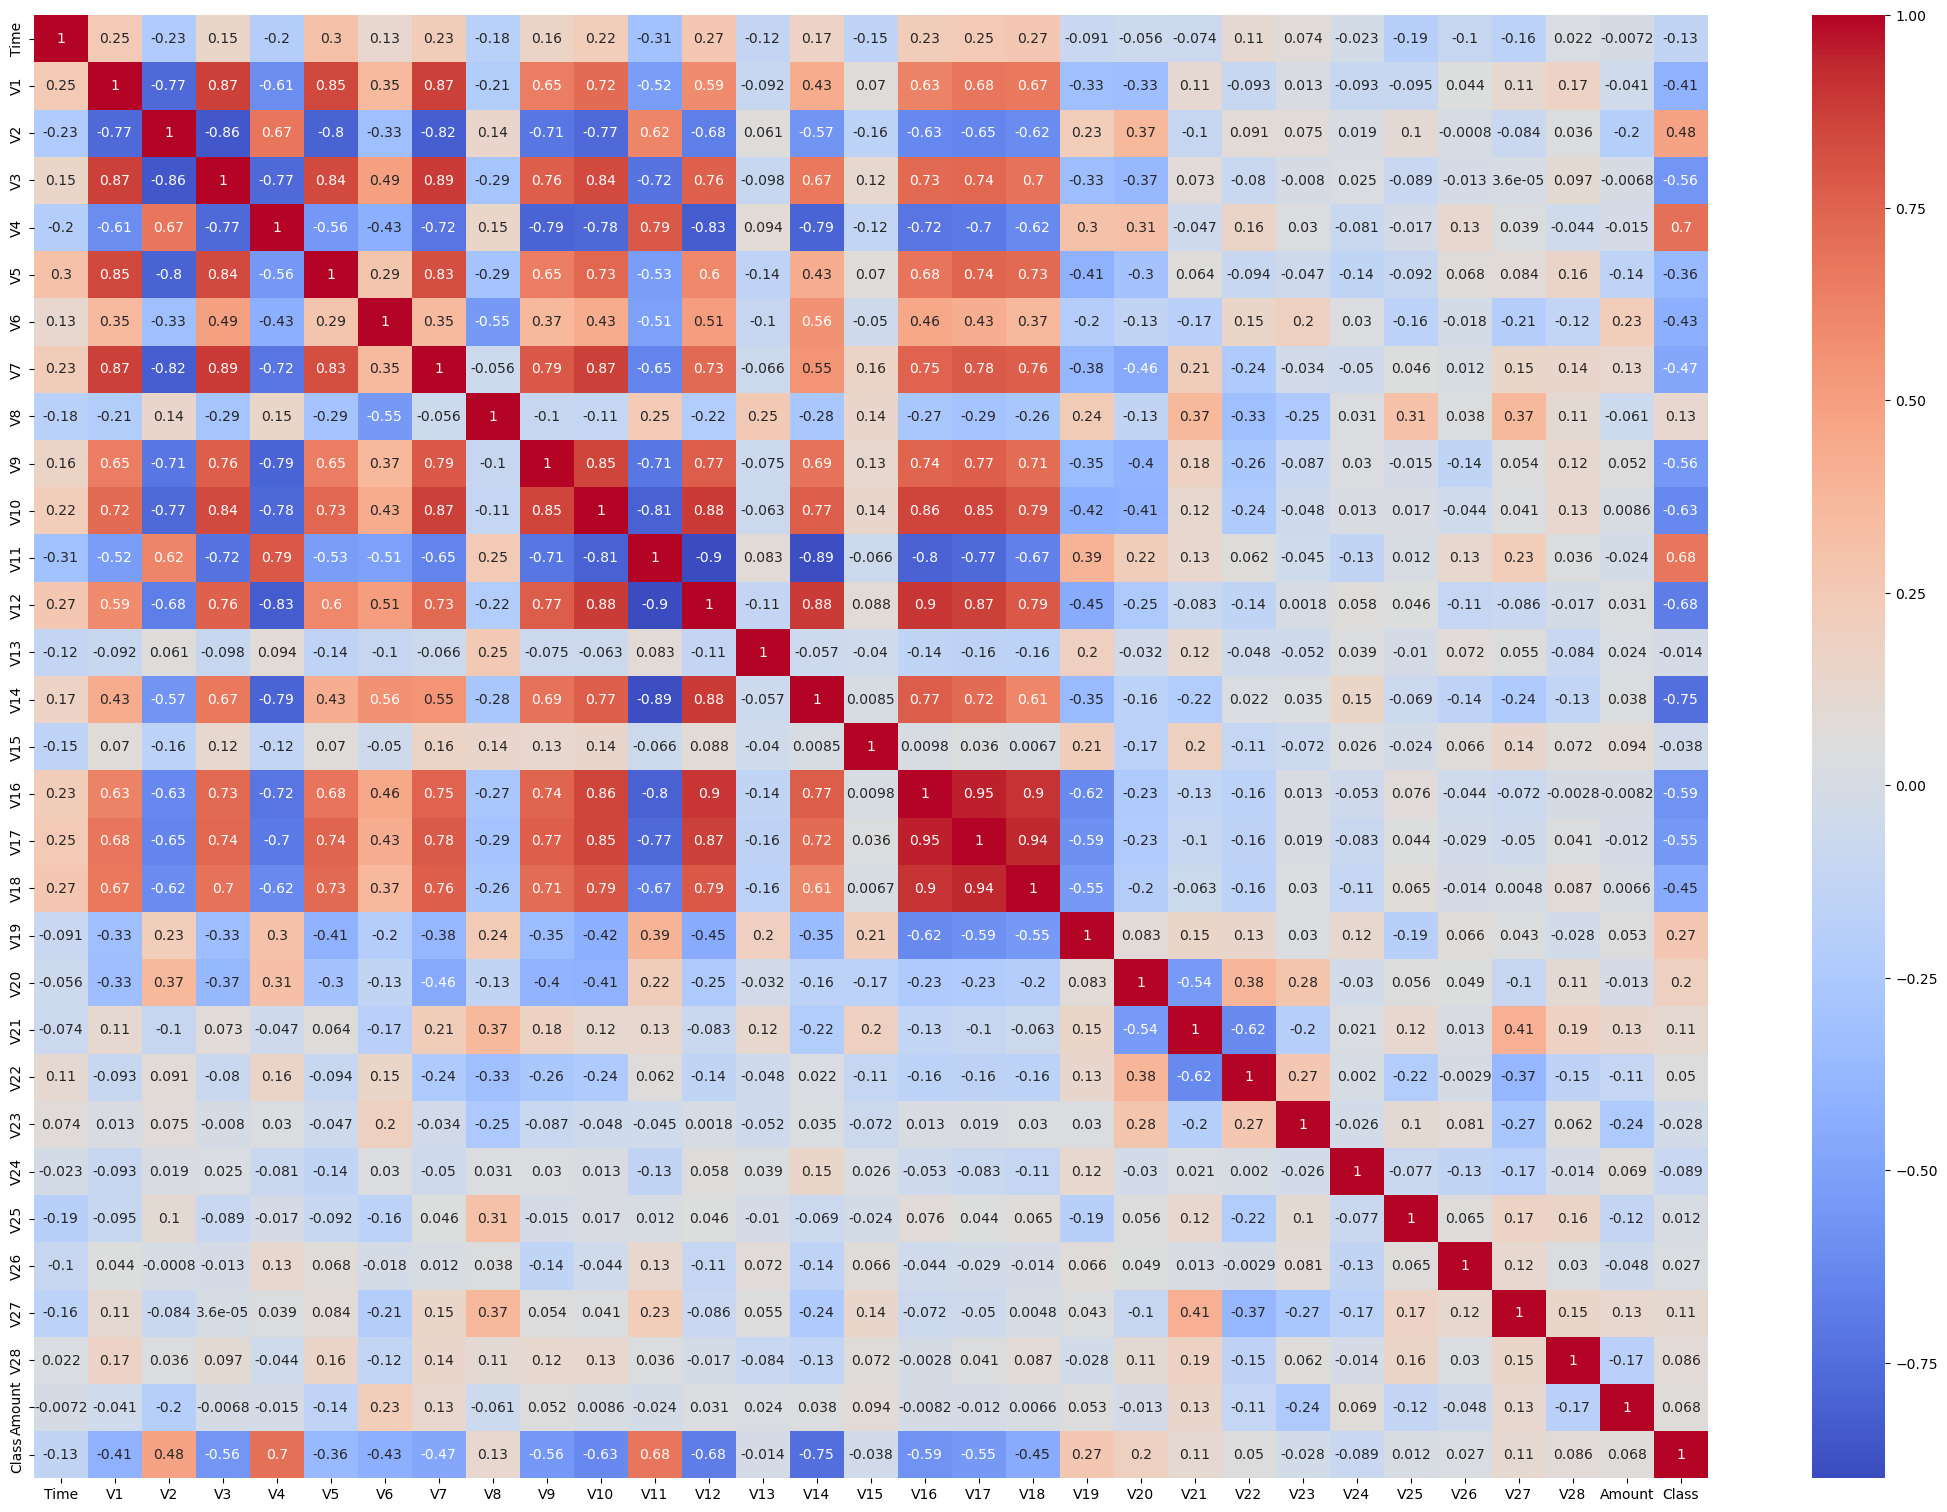

In [23]:
# plotting the heatmap for the correlation
plt.figure(figsize=(27,19))
sns.heatmap(new_df.corr(), cmap = 'coolwarm', annot= True )
plt.show()

## Splitting the data into features and target

In [24]:
x = new_df.drop(columns='Class',axis=1)
y = new_df['Class']

In [25]:
y

15538     0
121965    0
279202    0
29104     0
171012    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64

In [26]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
15538,26930.0,-2.049444,-2.120651,2.263753,-1.481701,1.935508,-0.973156,-1.516857,0.122478,-0.468878,...,1.006757,0.360629,0.747861,-0.211132,-0.933079,0.839918,-0.059260,0.075746,-0.062637,9.10
121965,76385.0,1.177811,0.296658,0.286432,0.991251,0.126681,0.119418,-0.023638,0.076871,-0.338249,...,-0.122566,0.132385,0.466552,-0.136234,-0.276705,0.634774,-0.249955,0.034714,0.005825,1.00
279202,168704.0,-1.417668,0.056666,2.760027,0.551785,-1.471575,2.525317,-2.293458,-1.900349,-0.247726,...,0.118579,-1.465320,0.688690,-0.510014,0.697665,0.197121,-0.249469,0.133030,0.119416,100.00
29104,35323.0,1.199279,0.007817,0.361189,0.776309,-0.367001,-0.483680,0.042117,-0.146830,0.415614,...,-0.017201,-0.232101,-0.530065,-0.063371,0.083957,0.506528,0.286284,-0.025545,0.015580,37.08
171012,120454.0,-1.066057,1.663120,-1.096740,-0.754692,0.307434,-0.630656,0.369926,0.567332,0.410890,...,0.164142,-0.328924,-0.894637,0.211763,0.542777,-0.373781,0.100936,0.265371,0.198828,9.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


## splitting the data into training and testing data

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,stratify=y,random_state=15)

## Model training

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### Training the LR model with train data

In [29]:
model.fit(x_train,y_train)

LogisticRegression()

## Model evaluation

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Accuracy score

### Accuracy of training data

In [31]:
y_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_pred,y_train)
print("Accuracy of training data:", training_data_accuracy*100,"%")

Accuracy of training data: 94.17989417989418 %


### Accuracy of test data

In [32]:
y_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test_pred,y_test)
print("Accuracy of test data:",test_data_accuracy*100,"%")

Accuracy of test data: 93.15789473684211 %


### Plotting the accuracy of train and test data

C:\Users\Acer11\AppData\Local\Temp\ipykernel_6416\326180514.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')


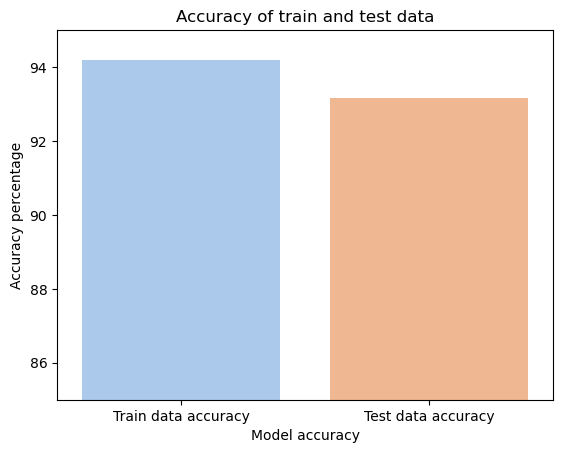

In [33]:
sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')
plt.title("Accuracy of train and test data")
plt.ylim(85,95)
plt.xlabel("Model accuracy")
plt.ylabel("Accuracy percentage")
plt.show()

### Confusion matrix

In [34]:
print(confusion_matrix(y_test,y_test_pred))

[[88  7]
 [ 6 89]]


### Classification report

In [35]:
print("Classification report:\n",classification_report(y_test,y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        95
           1       0.93      0.94      0.93        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

